### **Dynamic Games of Complete Information**

Dynamic games involve sequential decision-making, where players make decisions one after another, observing the actions taken by those who moved earlier. These games are best represented using **extensive form representation**, often depicted as **game trees**. The game tree structure provides a clear visualization of the sequential nature of the decisions and the available strategies.

**Definition**:  
An **extensive form game** is a representation of a game that explicitly shows:
- The sequence of moves.
- The players making decisions at each stage.
- The available actions at each decision point.
- The payoffs at the end of the game.

The extensive form uses **game trees**, where:
- **Nodes** represent decision points.  
- **Branches** represent available actions.  
- **Terminal nodes** (leaves) represent the outcomes and associated payoffs.

## Advertising example

Here's the game tree illustrating the advertising decision scenario:

The whole market brings $4\$$ of revenue. If only one of them advertises, they get the whole market for themselves, otherwise it's split half and half.
Advertising cost $1\$$ for each.

1. **Alice's Decision**: Alice chooses whether to advertise her product.
2. **Bob's Decision**: If Alice advertises, Bob decides whether to advertise or not.
3. **Outcomes**: Bob's reward in the end. 

The tree visually represents the sequence of decisions and potential outcomes.

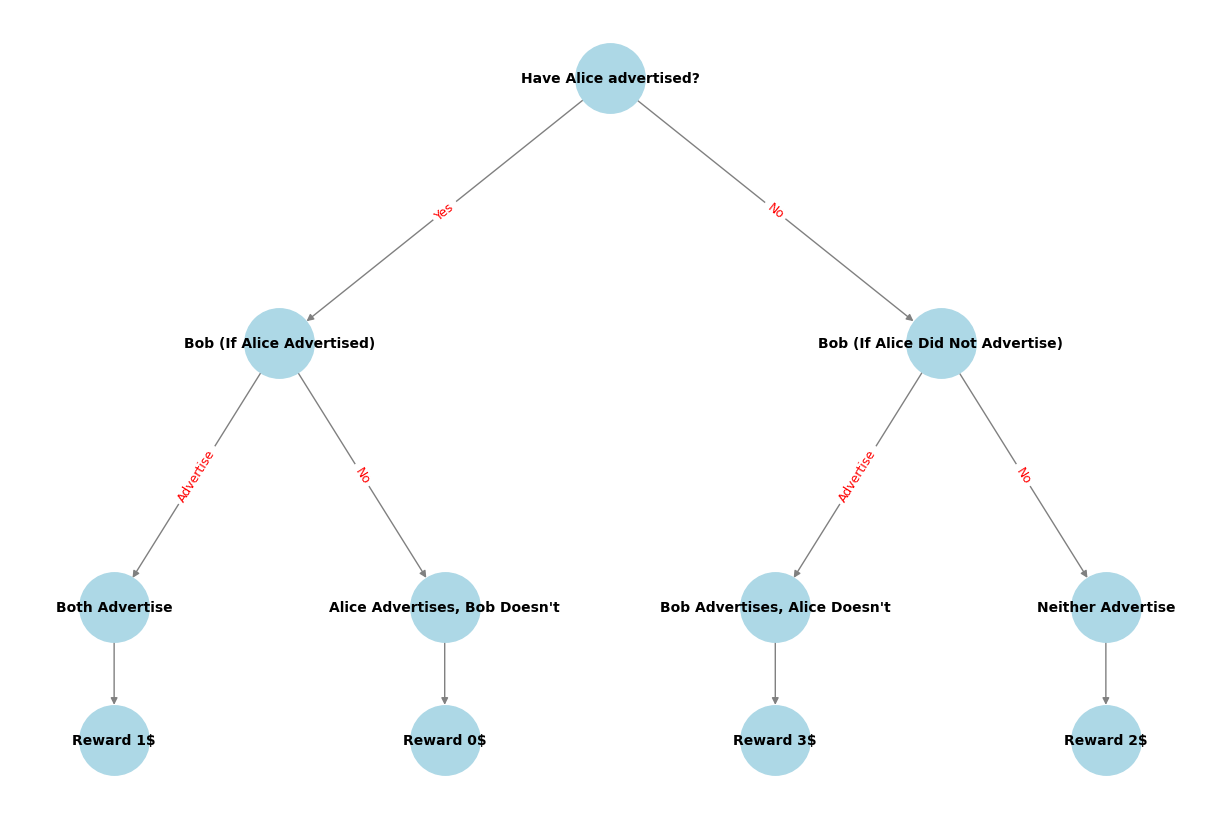

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = {
    "Have Alice advertised?": (0, 2),
    "Bob (If Alice Advertised)": (-2, 0),
    "Bob (If Alice Did Not Advertise)": (2, 0),
    "Both Advertise": (-3, -2),
    "Reward 1$": (-3, -3),
    "Bob Advertises, Alice Doesn't": (1, -2),
    "Reward 3$": (1, -3),
    "Alice Advertises, Bob Doesn't": (-1, -2),
    "Reward 0$": (-1, -3),
    "Neither Advertise": (3, -2),
    "Reward 2$": (3, -3),
}

for node, pos in nodes.items():
    G.add_node(node, pos=pos)

edges = [
    ("Have Alice advertised?", "Bob (If Alice Advertised)", "Yes"),
    ("Have Alice advertised?", "Bob (If Alice Did Not Advertise)", "No"),
    ("Bob (If Alice Advertised)", "Alice Advertises, Bob Doesn't", "No"),
    ("Bob (If Alice Did Not Advertise)", "Bob Advertises, Alice Doesn't", "Advertise"),
    ("Bob (If Alice Advertised)", "Both Advertise", "Advertise"),
    ("Bob (If Alice Did Not Advertise)", "Neither Advertise", "No"),
    ("Both Advertise", "Reward 1$", ""),
    ("Bob Advertises, Alice Doesn't", "Reward 3$", ""),
    ("Alice Advertises, Bob Doesn't", "Reward 0$", ""),
    ("Neither Advertise", "Reward 2$", ""),
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

positions = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos=positions,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=2500,
    font_size=10,
    font_weight="bold",
)

edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}
nx.draw_networkx_edge_labels(
    G, pos=positions, edge_labels=edge_labels, font_color="red", font_size=9
)

plt.show()



### **Solving Extensive Form Games**

Dynamic games are solved using **backward induction**, a method where players start from the end of the game tree (terminal nodes) and work backward to determine the optimal strategy at each decision point.  

**Steps for Backward Induction**:
1. Begin at the terminal nodes and calculate the payoffs for each possible outcome.  
2. At each decision node, identify the action that maximizes the player’s payoff, assuming rational behavior.  
3. Propagate these optimal decisions backward through the tree until the root is reached.


## **Hometask 1**
Let's solve the game above for Bob. In both cases of Alice's decision, advertising will bring Bob more reward, which means the strategy is to always advertise.
- What if the advertising cost $2\$$? What if $3\$$? Will it change the answer then?
- What if Bob has better advertiser and the market split not half and half, but $30%$ for Alice and $70%$ for Bob?

Draw the game trees for these cases and decide the best strategies then.

### **The Ultimatum Game**

#### Scenario: Sharing a Reward  
Alice and Bob must decide how to split $100\$$:  
- Alice proposes a split.  
- Bob decides whether to **Accept** or **Reject** the proposal.  
- If Bob accepts, the money is split as proposed. If Bob rejects, both get nothing.

#### Game Tree Representation:

1. **Node 1**: Alice proposes a split (e.g., Alice: $70\$$, Bob: $30\$$).  
2. **Node 2**: Bob decides: **Accept** or **Reject**.  

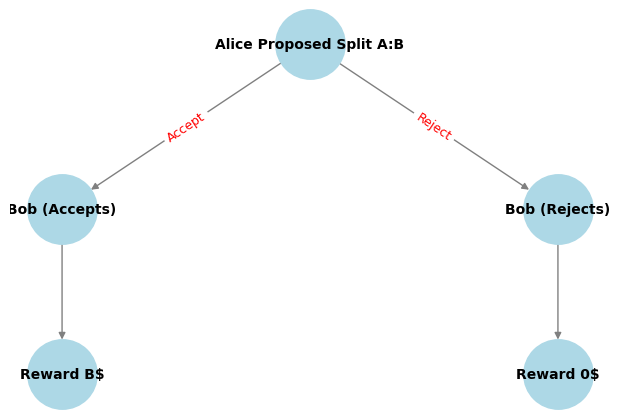

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = {
    "Alice Proposed Split A:B": (0, 0.5),
    "Bob (Accepts)": (-1, 0),
    "Bob (Rejects)": (1, 0),
    "Reward B$": (-1, -0.5),
    "Reward 0$": (1, -0.5),
}

for node, pos in nodes.items():
    G.add_node(node, pos=pos)

edges = [
    ("Alice Proposed Split A:B", "Bob (Accepts)", "Accept"),
    ("Alice Proposed Split A:B", "Bob (Rejects)", "Reject"),
    ("Bob (Accepts)", "Reward B$", ""),
    ("Bob (Rejects)", "Reward 0$", ""),
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

positions = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(6, 4))
nx.draw(
    G,
    pos=positions,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=2500,
    font_size=10,
    font_weight="bold",
)

edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}
nx.draw_networkx_edge_labels(
    G, pos=positions, edge_labels=edge_labels, font_color="red", font_size=9
)

plt.show()

**Solving via Backward Induction**:
- Bob accepts if his share is greater than $0\$$; otherwise, he rejects.  
- Knowing this, Alice offers the smallest amount Bob will accept (e.g., $1\$$ for Bob, $99\$$ for Alice).  

**Equilibrium Outcome**: Alice offers $99, 1$, and Bob accepts.  

### **Expanded Ultimatum Game**

1. **Alice** offers a split of $100\$$.
2. **Bob** decides whether to **accept** or **reject** the offer.  
   - If Bob accepts, the game ends, and both players receive the agreed split.  
   - If Bob rejects, they get another turn to counteroffer.  
3. **Alice** can either accept Bob’s counteroffer or reject it.  
   - If Alice accepts, the split proceeds as per Bob’s counteroffer.  
   - If Alice rejects, both players get nothing.  

This back-and-forth negotiation can continue for a fixed number of rounds, e.g., **3 turns total** (1 initial offer, 2 counteroffers). At the final round, rejection results in both players getting $0\$$.

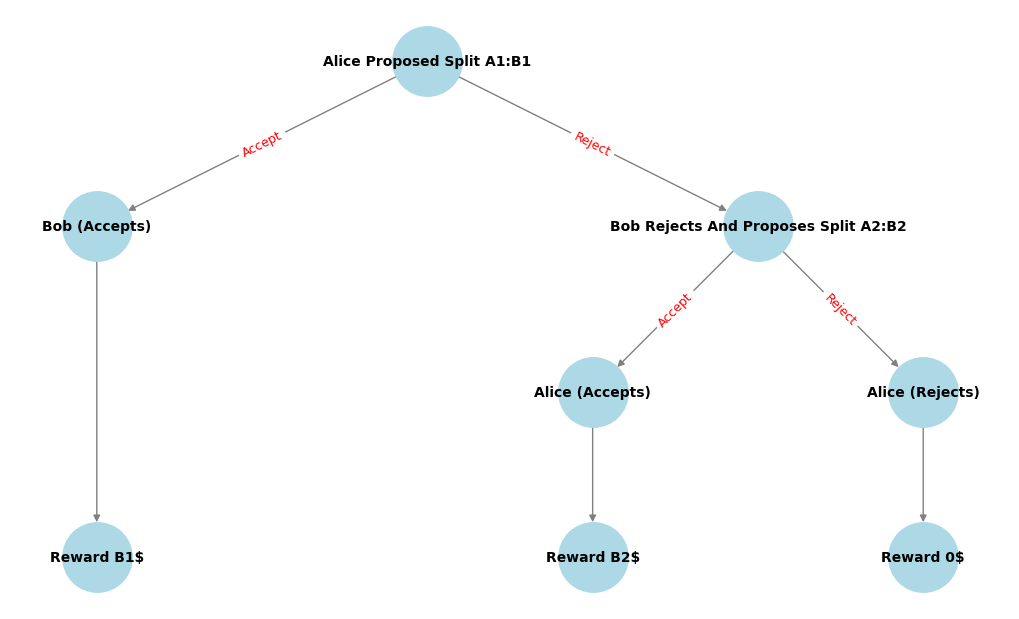

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = {
    "Alice Proposed Split A1:B1": (0, 0.5),
    "Bob (Accepts)": (-1, 0),
    "Reward B1$": (-1, -1),
    "Bob Rejects And Proposes Split A2:B2": (1, 0),
    "Alice (Accepts)": (0.5, -0.5),
    "Alice (Rejects)": (1.5, -0.5),
    "Reward 0$": (1.5, -1),
    "Reward B2$": (0.5, -1)
}

for node, pos in nodes.items():
    G.add_node(node, pos=pos)

edges = [
    ("Alice Proposed Split A1:B1", "Bob (Accepts)", "Accept"),
    ("Alice Proposed Split A1:B1", "Bob Rejects And Proposes Split A2:B2", "Reject"),
    ("Bob (Accepts)", "Reward B1$", ""),
    ("Bob Rejects And Proposes Split A2:B2", "Alice (Accepts)", "Accept"),
    ("Bob Rejects And Proposes Split A2:B2", "Alice (Rejects)", "Reject"),
    ("Alice (Accepts)", "Reward B2$", ""),
    ("Alice (Rejects)", "Reward 0$", ""),
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

positions = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(10, 6))
nx.draw(
    G,
    pos=positions,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=2500,
    font_size=10,
    font_weight="bold",
)

edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}
nx.draw_networkx_edge_labels(
    G, pos=positions, edge_labels=edge_labels, font_color="red", font_size=9
)

plt.show()

- In the last round, the rejecting player knows they’ll lose everything, so they accept any non-zero offer.
- This reasoning propagates backward: players anticipate acceptance of minimal offers and adjust their strategies to make minimally acceptable offers earlier.

## **Hometask 2**
- Draw the tree if they lose $50\%$ or their reward each time they reject other's offer
- What is there is $\inf$ rounds until someone accept? What is the strategy then?

### **Subgame Perfect Nash Equilibrium (SPNE)**

**Subgame**: A part of the game that starts at a decision node and includes all subsequent nodes and actions. A subgame is effectively a smaller game within the larger game. 
The concept of **Subgame Perfect Nash Equilibrium (SPNE)** refines Nash Equilibrium for dynamic games. It ensures that players’ strategies form a Nash Equilibrium not just in the game as a whole, but in every subgame of the game. It eliminates non-credible threats—strategies that a rational player would not actually follow when the time comes to execute them. SPNE is typically found using **backward induction**.

Ultimatum Game from the previous section can be used as an example of such strategy. 


### **Cleaning Street Game**

#### Step 1
Alice and Bob face an option of cleaning up the street, so their businesses have more satisfied clients. They each can contribute $C_A$ or $C_B$ towards it. Then the payoff would be: $$P_i(C_A, C_B) = C_A + C_B + \frac{C_A * C_B}{2} - \frac{C_i^2}{2}$$

Nash equilibrium would be $C_A = C_B = 2$ and $P_A = P_B = 4$. Build a table to understand why it is $2$ (Hint: if they made decision together, their strategy is symmetrical and $C_A = C_B$ in derivative).

#### Step 2
Now, let's say Alice make a decision first and calculate backwards what would be the best decision for Bob.
The derivative of the function with fixed $C_A$ would be $$\frac{\delta P_B}{\delta C_B} = 1 + \frac{C_A}{2} - C_B = 0$$ to find the optimal solution. Than optimal $$C_B = 1 + \frac{C_A}{2}$$.

#### Step 3
Let's take it even further. Let's say Alice would account for Bob's optimal strategy when choosing her contribution, then: $$P_A = C_A + (1 + \frac{C_A}{2}) + \frac{C_A \dot (1 + \frac{C_A}{2})}{2} - \frac{C_A^2}{2}$$

If we calculate the derivative and find optimum for it, the optimal solution will be $C_A = 4$, then $C_B = 3$ and their payoffs $P_A = 6$ and $P_B = 8.5$.

As a result, they both improved their payoffs buy optimizing, but Bob improved its better by going second. 

### **Applications**

The main areas and practical scienarios  whene SPNE applies are sequential auctions and multi-step negotiations.

**Sequential Auctions**:
   - Items are sold one after another, and bidders must decide how much to bid at each stage.
   - Players consider their budget constraints, valuations of items, and potential future opportunities.
   - Decisions at each step depend on past outcomes and remaining options.

**Problem**: Bidding aggressively early may secure a valuable item but at the cost of budget reduction for later items, but holding back early might allow competitors to secure valuable items cheaply, reducing future competition.

**Multi-Step Negotiations**:
   - Negotiations occur in stages, with offers and counteroffers exchanged over time.
   - Players aim to maximize their utility by considering the potential reactions of the other party.
   - Credible threats and promises are essential for influencing outcomes.
     
**Examples**: diplomatic agreements, business deals, and labor contract negotiations.

##### **Auction with 2 Items**
Imagine two items (X, Y) being auctioned sequentially:
1. Alice and Bob each have a budget of $100\$$.
2. Alice values X at $60\$$ and Y at $40\$$. Bob values X at $50\$$ and Y at $70\$$.

Let's draw the game tree for the auction.

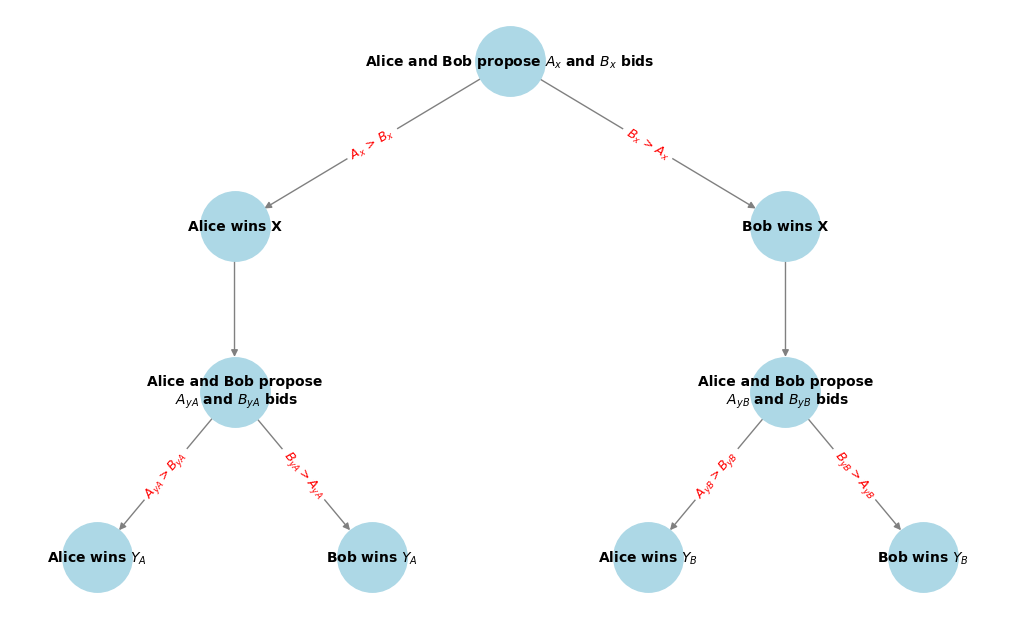

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

nodes = {
    "Alice and Bob propose $A_x$ and $B_x$ bids": (0, 0.5),
    "Alice wins X": (-1, 0),
    "Alice and Bob propose\n $A_{yA}$ and $B_{yA}$ bids": (-1, -0.5),
    "Alice wins $Y_A$": (-1.5, -1),
    "Bob wins $Y_A$": (-0.5, -1),
    "Bob wins X": (1, 0),
    "Alice and Bob propose\n $A_{yB}$ and $B_{yB}$ bids": (1, -0.5),
    "Alice wins $Y_B$": (0.5, -1),
    "Bob wins $Y_B$": (1.5, -1)
}

for node, pos in nodes.items():
    G.add_node(node, pos=pos)

edges = [
    ("Alice and Bob propose $A_x$ and $B_x$ bids", "Alice wins X", "$A_x$ > $B_x$"),
    ("Alice and Bob propose $A_x$ and $B_x$ bids", "Bob wins X", "$B_x$ > $A_x$"),
    ("Alice wins X", "Alice and Bob propose\n $A_{yA}$ and $B_{yA}$ bids", ""),
    ("Bob wins X", "Alice and Bob propose\n $A_{yB}$ and $B_{yB}$ bids", ""),
    ("Alice and Bob propose\n $A_{yA}$ and $B_{yA}$ bids", "Alice wins $Y_A$", "$A_{yA} > B_{yA}$"),
    ("Alice and Bob propose\n $A_{yA}$ and $B_{yA}$ bids", "Bob wins $Y_A$", "$B_{yA} > A_{yA}$"),
    ("Alice and Bob propose\n $A_{yB}$ and $B_{yB}$ bids", "Alice wins $Y_B$", "$A_{yB} > B_{yB}$"),
    ("Alice and Bob propose\n $A_{yB}$ and $B_{yB}$ bids", "Bob wins $Y_B$", "$B_{yB} > A_{yB}$")
]

for edge in edges:
    G.add_edge(edge[0], edge[1], label=edge[2])

positions = nx.get_node_attributes(G, "pos")

plt.figure(figsize=(10, 6))
nx.draw(
    G,
    pos=positions,
    with_labels=True,
    node_color="lightblue",
    edge_color="gray",
    node_size=2500,
    font_size=10,
    font_weight="bold",
)

edge_labels = {(edge[0], edge[1]): edge[2] for edge in edges}
nx.draw_networkx_edge_labels(
    G, pos=positions, edge_labels=edge_labels, font_color="red", font_size=9
)

plt.show()

Let's solve the auction under specific assumption: Alice and Bob know each other's values. 

What we can conclude from these conditions:
1. There is no need to bid higher than their values: for example, Bob values $71\$$ more than item Y.
2. If we know other's values than it would make sense to bid the minimum bid higher than the other. 

**Subgame 1**
Let's solve the auction backwards and see the solve for item $Y_A$ (The i in Y_{i} defines who won item X). If Alice won X, then her budget would be (100 - $A_X$) for competeng for $Y_A$, Bob, knowing her value ($40\$$) would only need to bid higher than this, so his bid would be $41\$$ to win and $59\$$ to spare.
- Alice: Item X, (100 - $A_X$)$\$$ spare money
- Bob: Item Y, $59\$$ spare money

**Subgame 2**
Let's solve the auction backwards and see the solve for item $Y_B$. If Bob won X, then her budget would be (100 - $B_X$) for competeng for $Y_B$, Alice, knowing his value ($70\$$) would only need to bid higher than this, but this is higher than her value, so she would bid her value $40\$$.
1. If $(100 - B_X) > 40$, then Bob wins also item X, because he would bid $\min(70, 100 - B_X)$.
2. If $(100 - B_X) < 40$, then $B_X > 60$, which is higher than Bob's value for X, that means, he wouldn't bid that and this is impossible case. 

- Alice: $100\$$ spare money
- Bob: Item X. Item Y, $(100 - B_X - min(70, 100 - B_X))\$$ spare money

Judging from the condition Alice should only compete for both of the items if she could buy them cheaper than her values, since she values their sum exactly as $100\$$ she might not need to participate to have the same payoff.

Let's take a look at the bidding for Item X. Since Bob values it at $50\$$, it would be his max bid. Knowing that, Alice may bid only $51\$$ to win and have $49\$$ dollars for the next round, which will result at her total payoff: Item X($60\$$) + $49\$$ = $109\$$.
For Bob (we are going into Subgame 1), it will be Item Y($70\$$) + $59\$$ spare money = $129\$$. 

- Alice: $109\$$ final value
- Bob: $129\$$ final value

Let's say for any reason Alice bid $A_X$ is under $50\$$. Then Bob wins Item X with his $50\$$ bid. Then he wins Item Y with another $50\$$ bid and his total value would be Item X($50\$$) + Item Y($70\$$) = $120\$$.

- Alice: $100\$$ final value
- Bob: $120\$$ final value

So, in case of inoptimal strategy for at least 1 of them, they both lose compared to SPNE strategizing. 

## Hometask 3

1. Think about auctions for 3 items. Plot the graphs for these auctions.
2. What if in the problem above Alice and Bob didn't know each other's values?